_Data from http://archive.ics.uci.edu/ml/datasets/diabetes_
## Data Set Information:

Diabetes patient records were obtained from two sources: an automatic electronic recording device and paper records. The automatic device had an internal clock to timestamp events, whereas the paper records only provided "logical time" slots (breakfast, lunch, dinner, bedtime). For paper records, fixed times were assigned to breakfast (08:00), lunch (12:00), dinner (18:00), and bedtime (22:00). Thus paper records have fictitious uniform recording times whereas electronic records have more realistic time stamps. 

Diabetes files consist of four fields per record. Each field is separated by a tab and each record is separated by a newline. 

File Names and format:
```
(1) Date in MM-DD-YYYY format 
(2) Time in XX:YY format 
(3) Code 
(4) Value
```

The Code field is deciphered as follows: 
```
33 = Regular insulin dose 
34 = NPH insulin dose 
35 = UltraLente insulin dose 
48 = Unspecified blood glucose measurement 
57 = Unspecified blood glucose measurement 
58 = Pre-breakfast blood glucose measurement 
59 = Post-breakfast blood glucose measurement 
60 = Pre-lunch blood glucose measurement 
61 = Post-lunch blood glucose measurement 
62 = Pre-supper blood glucose measurement 
63 = Post-supper blood glucose measurement 
64 = Pre-snack blood glucose measurement 
65 = Hypoglycemic symptoms 
66 = Typical meal ingestion 
67 = More-than-usual meal ingestion 
68 = Less-than-usual meal ingestion 
69 = Typical exercise activity 
70 = More-than-usual exercise activity 
71 = Less-than-usual exercise activity 
72 = Unspecified special event
```

In [1]:
from pathlib import Path
import re

import pandas as pd

def load(data_path='data'):
    dfs = []
    for p in Path(data_path).iterdir():
        match = re.search(r'\d\d$', str(p))
        if match:
            df = pd.read_csv(p, sep='\t', header=None, 
                             names=['Date', 'Time', 'Code', 'Value'])
            df['person_id'] = int(match[0])
            dfs.append(df)
    df = pd.concat(dfs)

    code_map = {
        33: 'Regular insulin dose',
        34: 'NPH insulin dose',
        35: 'UltraLente insulin dose',
        48: 'Unspecified blood glucose measurement',
        57: 'Unspecified blood glucose measurement',
        58: 'Pre-breakfast blood glucose measurement',
        59: 'Post-breakfast blood glucose measurement',
        60: 'Pre-lunch blood glucose measurement',
        61: 'Post-lunch blood glucose measurement',
        62: 'Pre-supper blood glucose measurement',
        63: 'Post-supper blood glucose measurement',
        64: 'Pre-snack blood glucose measurement',
        65: 'Hypoglycemic symptoms',
        66: 'Typical meal ingestion',
        67: 'More-than-usual meal ingestion',
        68: 'Less-than-usual meal ingestion',
        69: 'Typical exercise activity',
        70: 'More-than-usual exercise activity',
        71: 'Less-than-usual exercise activity',
        72: 'Unspecified special event',
    }
    
    df['code_cat'] = df['Code'].map(code_map)
    
    df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], 
                                     format="%m-%d-%Y %H:%M", errors='coerce')
    
    df = df.drop(columns=['Date', 'Time'])
    
    print(f"{sum(df['date_time'].isna())} records failed to convert to date")
    df = df.loc[~df['date_time'].isna()]

    return df

In [2]:
df = load(data_path='data')

45 records failed to convert to date


In [3]:
df.shape

(29285, 5)

In [4]:
df.head()

,Code,Value,person_id,code_cat,date_time
0,58,100,1,Pre-breakfast blood glucose measurement,1991-04-21 09:09:00
1,33,9,1,Regular insulin dose,1991-04-21 09:09:00
2,34,13,1,NPH insulin dose,1991-04-21 09:09:00
3,62,119,1,Pre-supper blood glucose measurement,1991-04-21 17:08:00
4,33,7,1,Regular insulin dose,1991-04-21 17:08:00


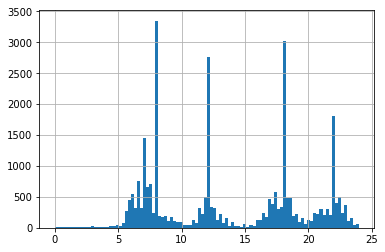

In [7]:
(df['date_time'].dt.hour + df['date_time'].dt.minute / 60).hist(bins=100);

In [9]:
mask = (df['date_time'].dt.hour.isin([8, 12, 18, 22]) & 
        (df['date_time'].dt.minute == 0))
df = df.loc[~mask]

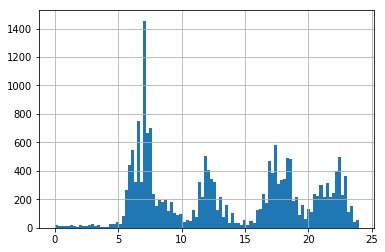

In [10]:
(df['date_time'].dt.hour + df['date_time'].dt.minute / 60).hist(bins=100);

In [11]:
# potentially fake data from https://github.com/tidepool-org, but could
# be a useful data structure to emulate
df = pd.read_csv('https://raw.githubusercontent.com/tidepool-org/'
                 'data-analytics/master/examples/example-data/'
                 'example-from-j-jellyfish.csv')

print(df.shape)

df.head()

(2196, 54)


,jsonRowIndex,annotations,clockDriftOffset,conversionOffset,deliveryType,deviceId,deviceTime,duration,expectedDuration,guid,...,state,timeProcessing,timezone,version,bgInput,bolus,carbInput,insulinCarbRatio,insulinOnBoard,recommended
0,2193,NaN,0.0,0,scheduled,InsOmn-130346997,2017-12-31T18:00:00,14400000.0,NaN,6b6b6e42-abcf-4554-b121-7074a0918484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2190,NaN,0.0,0,scheduled,InsOmn-130346997,2017-12-31T22:00:00,7200000.0,NaN,cc62b7b6-227c-4bef-9883-b88066063706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2188,NaN,0.0,0,scheduled,InsOmn-130346997,2018-01-01T00:00:00,12600000.0,NaN,5f37715a-3589-4283-8d88-f9398f14c2d3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2185,NaN,0.0,0,scheduled,InsOmn-130346997,2018-01-01T03:30:00,7200000.0,NaN,f9aeb728-6723-4f3d-8a03-cd8854a459bb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2184,NaN,0.0,0,scheduled,InsOmn-130346997,2018-01-01T05:30:00,10163000.0,NaN,bab3ca8e-f663-4299-a1c9-60b5b766a868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
